In [13]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [14]:
#df.sort_values(['x', 'y']).reset_index(drop=True).drop_duplicates()

In [15]:
def get_xy_mean(df) :
    try :
        return df[['x','y','grp']].groupby('grp').mean().reset_index(drop=True)
    except :
        df['grp'] =  0
        return df[['x','y','grp']].groupby('grp').mean().reset_index(drop=True)
    return df_avg

def gen_datapoints(N, from_, to_) :
    x = np.random.randint(from_, to_, N)
    y = np.random.randint(from_, to_, N)
    df = pd.DataFrame(list(zip(x, y)), columns=['x', 'y'])
    df['grp'] = 0
    return df


def calc_distance(df, centroids) :
    from_centroid1 = np.sqrt((df.x - centroids.loc[0].x)**2 + (df.y - centroids.loc[0].y)**2)
    from_centroid2 = np.sqrt((df.x - centroids.loc[1].x)**2 + (df.y - centroids.loc[1].y)**2)
    df['from_centroid1'] = from_centroid1
    df['from_centroid2'] = from_centroid2
    grp = np.where(df.from_centroid1 <= df.from_centroid2, 0, 1)
    df['grp'] = grp
    return df, centroids

def plot_graph(df, centroids,  ax, col) :
    ax[col].scatter(df.x, df.y, c=[ 'r' if i==1 else 'b' for i in df.grp], alpha=.5, s=20)
    ax[col].scatter(centroids.x, centroids.y, marker='*', edgecolor='w', s=2000, c=['b', 'r'])


In [16]:
def launch(dps, start, end) :
    df = gen_datapoints(dps, start, end)
    centroids = df.sample(2)[['x','y']].reset_index(drop=True)
    centroids_old = centroids.copy()
    plt.figure(figsize=(7.25,5))
    plt.scatter(df.x, df.y, c='k', alpha=.5, s=20)
    plt.scatter(centroids.x, centroids.y, marker='*', edgecolor='w', s=2000, c=['b', 'r'])
    plt.show()
    while True :
        df, centroids = calc_distance(df, centroids)
        fig,ax = plt.subplots(ncols=2, figsize=(16, 5), sharey=True )
        plot_graph(df, centroids, ax, 0)
        centroids = get_xy_mean(df)
        centroids = round(centroids,2)
        print(f" old centroids : \n{centroids_old} ")
        print('---------------')
        print(f" new centroids : \n{centroids}")
        if centroids_old.equals(centroids) :
            break
        else :
            plot_graph(df, centroids,  ax, 1)
            plt.show()
            centroids_old = centroids.copy()
    plot_graph(df,centroids, ax, 1)
    plt.show()
    return df

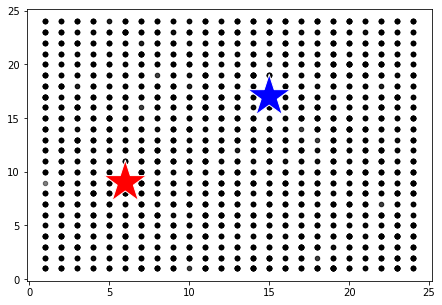

 old centroids : 
    x   y
0  15  17
1   6   9 
---------------
 new centroids : 
       x      y
0  16.60  15.34
1   7.75   8.20


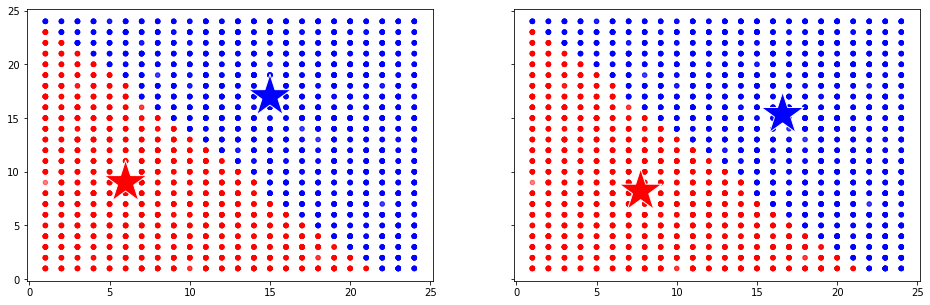

 old centroids : 
       x      y
0  16.60  15.34
1   7.75   8.20 
---------------
 new centroids : 
      x      y
0  17.1  15.22
1   7.7   8.74


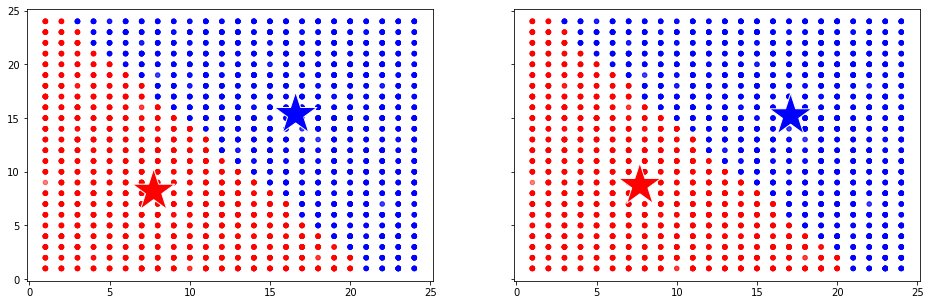

 old centroids : 
      x      y
0  17.1  15.22
1   7.7   8.74 
---------------
 new centroids : 
       x      y
0  17.58  14.89
1   7.51   9.32


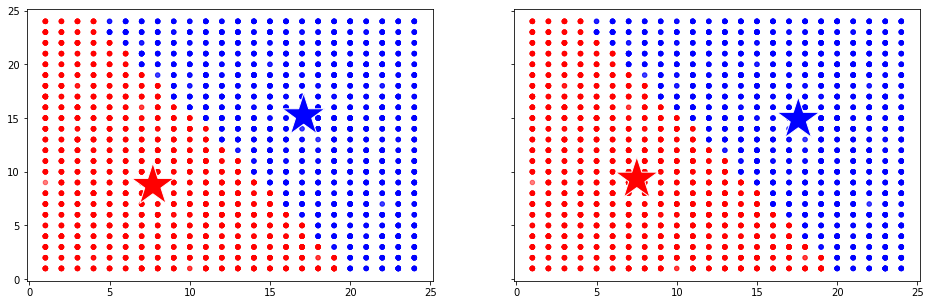

 old centroids : 
       x      y
0  17.58  14.89
1   7.51   9.32 
---------------
 new centroids : 
       x      y
0  18.01  14.39
1   7.25   9.92


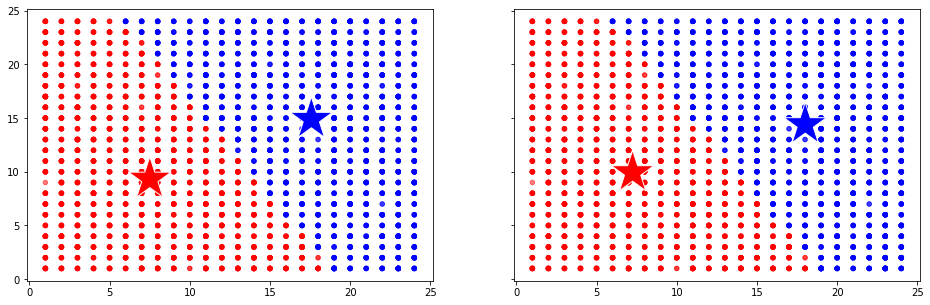

 old centroids : 
       x      y
0  18.01  14.39
1   7.25   9.92 
---------------
 new centroids : 
       x      y
0  18.32  13.84
1   7.01  10.52


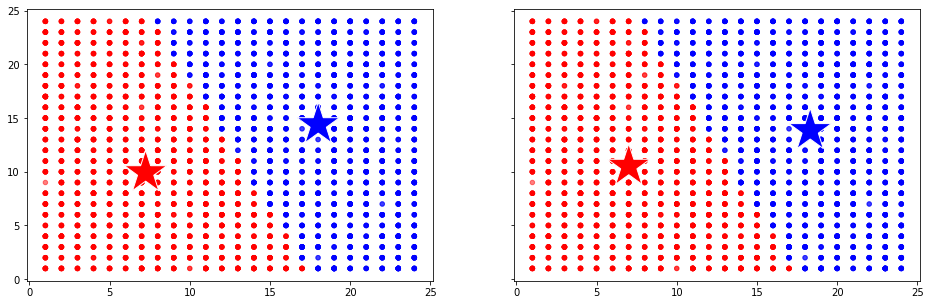

 old centroids : 
       x      y
0  18.32  13.84
1   7.01  10.52 
---------------
 new centroids : 
       x      y
0  18.50  13.39
1   6.87  10.98


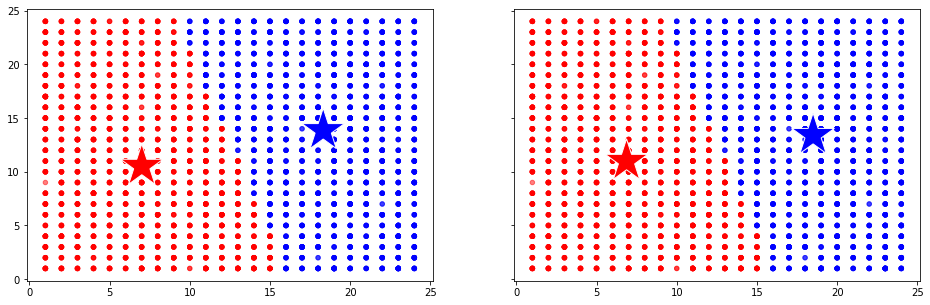

 old centroids : 
       x      y
0  18.50  13.39
1   6.87  10.98 
---------------
 new centroids : 
       x      y
0  18.59  13.06
1   6.80  11.31


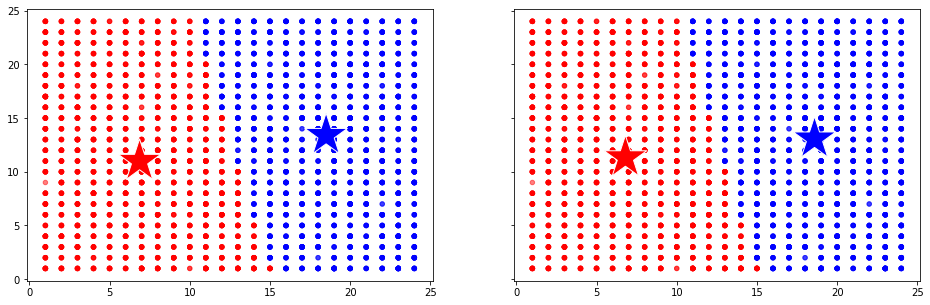

 old centroids : 
       x      y
0  18.59  13.06
1   6.80  11.31 
---------------
 new centroids : 
       x      y
0  18.64  12.87
1   6.78  11.51


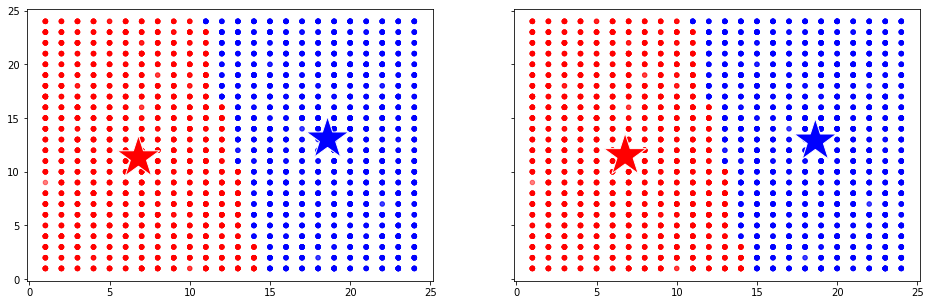

 old centroids : 
       x      y
0  18.64  12.87
1   6.78  11.51 
---------------
 new centroids : 
       x      y
0  18.64  12.61
1   6.71  11.75


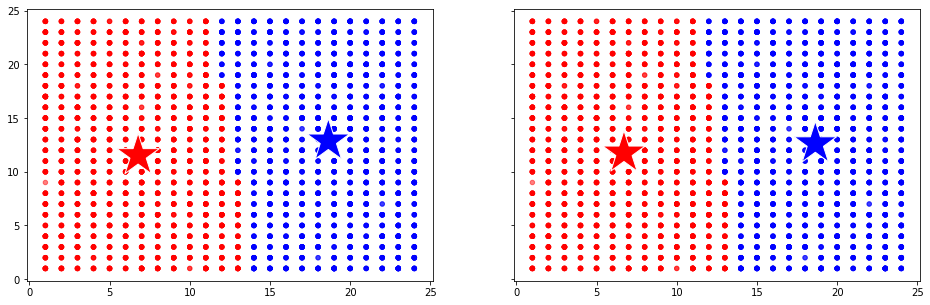

 old centroids : 
       x      y
0  18.64  12.61
1   6.71  11.75 
---------------
 new centroids : 
       x      y
0  18.64  12.51
1   6.69  11.85


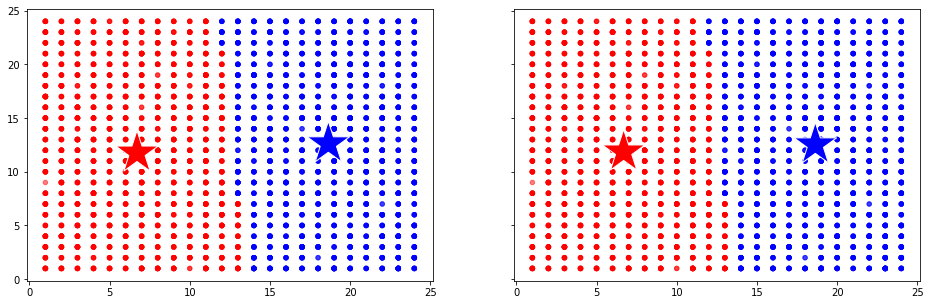

 old centroids : 
       x      y
0  18.64  12.51
1   6.69  11.85 
---------------
 new centroids : 
       x      y
0  18.68  12.40
1   6.71  11.97


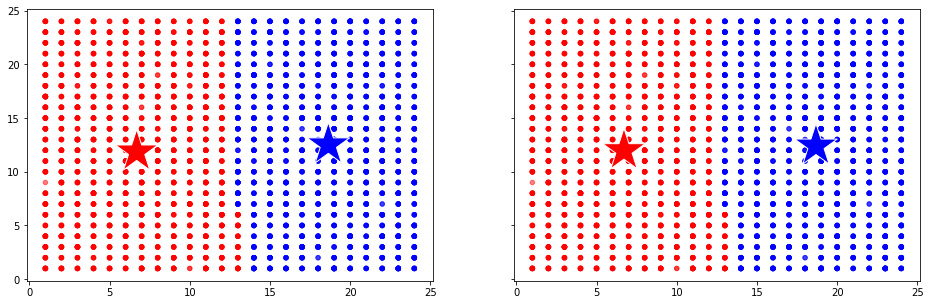

 old centroids : 
       x      y
0  18.68  12.40
1   6.71  11.97 
---------------
 new centroids : 
       x      y
0  18.62  12.32
1   6.64  12.04


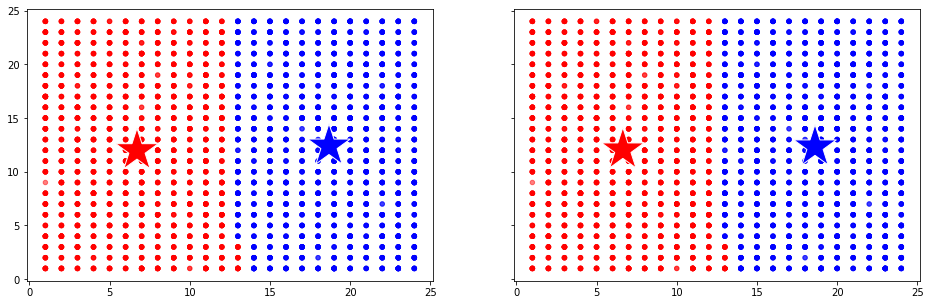

 old centroids : 
       x      y
0  18.62  12.32
1   6.64  12.04 
---------------
 new centroids : 
       x      y
0  18.55  12.20
1   6.57  12.17


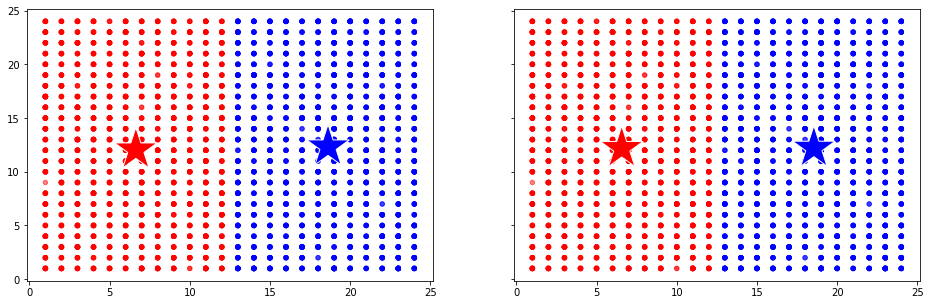

 old centroids : 
       x      y
0  18.55  12.20
1   6.57  12.17 
---------------
 new centroids : 
       x      y
0  18.55  12.20
1   6.57  12.17


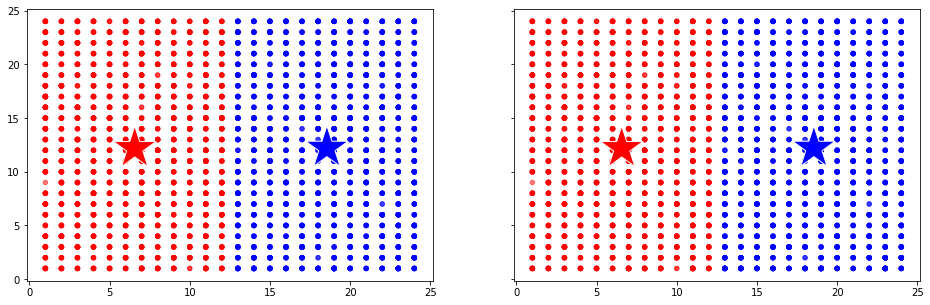

In [29]:
df = launch(5000, 1, 25)

In [ ]:

'''
K-Means Clustering - FORMING 2 CLUSTERS FOR A GIVEN DATASET

1. Launch 2 centroids (nothing but consider two datapoints  randomly selected from the
   dataset to be considered as central locations for 2 clusters (just made-up centroids)

2. Take the distance between each datapoint from these 2 centroids considered.
   The distance thus calculated will decide a datapoint's proximity to either of these 
   centroids

3. We will calculate the average of all the datapoints and reposition the centroids to
   their respective clusters
   
4. Point Nos. 2 and 3 will iterate. Once the centroids stop changing their positions, we
   will end the process. 
   
5. Now, we have 2 clusters in place.

'''